<a href="https://www.kaggle.com/code/luckychitundu/eda-logistic-regression-lda-qda-bagging-boosting?scriptVersionId=114536380" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **TITANIC**


**The Titanic was a British luxury passenger liner that sank on April 14–15, 1912, during its maiden voyage, en route to New York City from Southampton, England, killing about 1,500 Titanic passengers and ship personnel. [See Researcher’s Note](http://www.britannica.com/topic/Titanic/additional-info#Researchers-Note): One of the most famous tragedies in modern history, it inspired numerous stories, several films, and a musical and has been the subject of much scholarship and scientific speculation. In this notebook, we would like to identify factors that were instrumental in determining whether a given individual survived or not. Consequently, we would like to create a machine learning model to predict survival. Then we would like to evaluate the performance of the model on the training dataset and previously unseen data.**

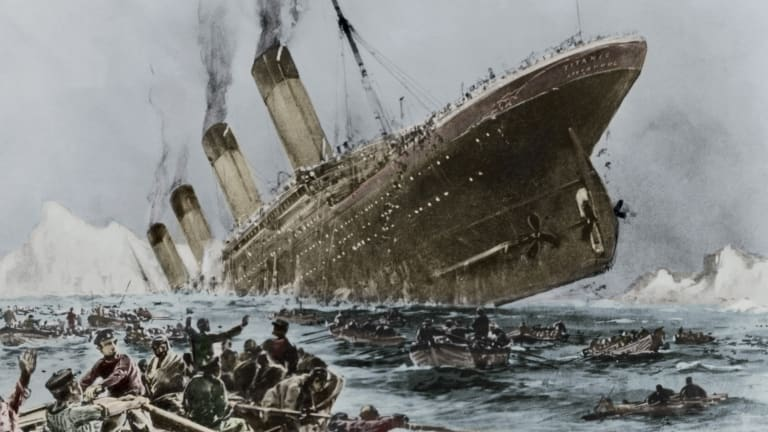

# **Importing libraries**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix, auc,roc_curve
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sample_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **EDA and Feature Engineering**

**Columns passengerId,Name,Ticket, and Cabin will be ignored since they do not convey so much statistical significance towards whether a given individual survived or not.******

In [5]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)
test.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**First, we want to ensure that the target column, Survived, has no representation bias, as this could affect the performance of our model**

<AxesSubplot:xlabel='Survived', ylabel='count'>

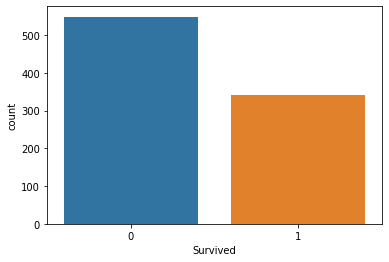

In [6]:
target = df["Survived"]
sns.countplot(x=target,data=df)

In [7]:
df.shape

(891, 8)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
df.describe(percentiles=[0.25,0.5,0.95]).T

,count,mean,std,min,25%,50%,95%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.00000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.00000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,56.00000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,3.00000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,2.00000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,112.07915,512.3292


# **COUNTPLOTS**

**We get a count of responses for each feature with respect to the target,i.e for each feature we would like to know which and how many responses led to survival and vice-versa.<br>Good for Categorical data**

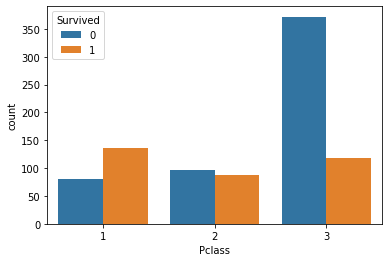

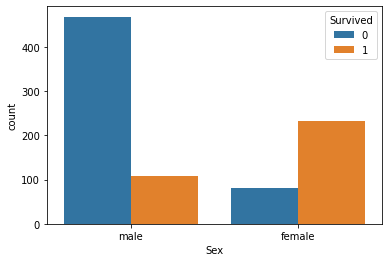

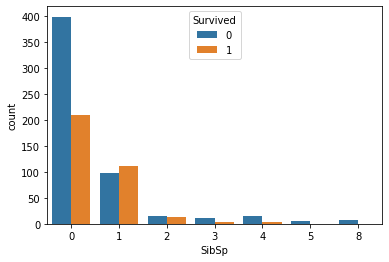

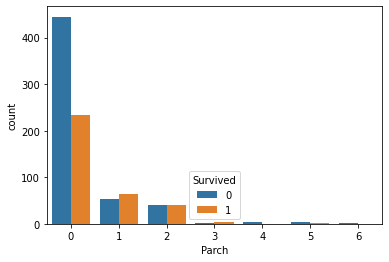

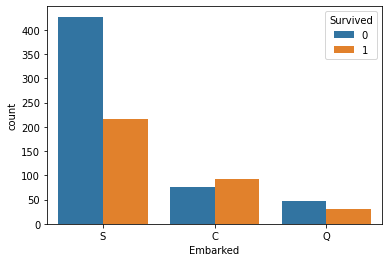

In [10]:
def count_features(features):
    for i,col in enumerate(features.columns):
        plt.figure(i)
        sns.countplot(x=features[col],hue=df["Survived"])
        
features = df.drop(["Survived","Age","Fare"],axis=1)
count_features(features)

**From the countplots, all responses could lead to either survival or death. We don't notice a particular feature with a response that produces only one color with a siginificant count. Also it is important to note that the Age and Fare column were ignored in these plots since they contain continuous values which may not be conveniently conveyed on a countplot**


# **VIOLIN PLOTS**

**We will produce violin plots for our numeric data i.e Age and Fare in order to assess their distributions across the target group.<br> Good for Continuous numeric data**

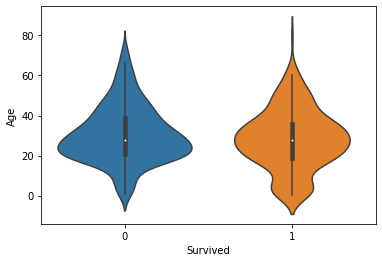

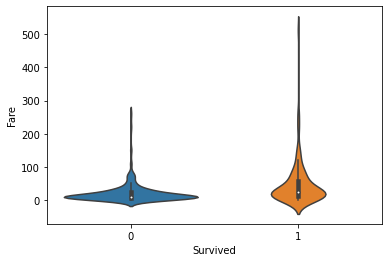

In [11]:
def plot_violin(num_features):
    for i,col in enumerate(num_features.columns):
        plt.figure(i)
        sns.violinplot(x=df["Survived"],y=col,data=df)
num_features = df[["Age","Fare"]]      
plot_violin(num_features)

**The violinplots for *age* look fairly similar. This suggests that age was not a key factor for survival.<br>
While violinplots for fare are not geometrically similar, we can infere that majority of passengers who did not survive had a fare of not more than 10 pounds. Interestingly, the same is true for those that survived. Majority of passengers who survived had a fare of not more than 10 pounds.**

# **CORRELATION**

In [12]:
correlation =df.corr()
correlation

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

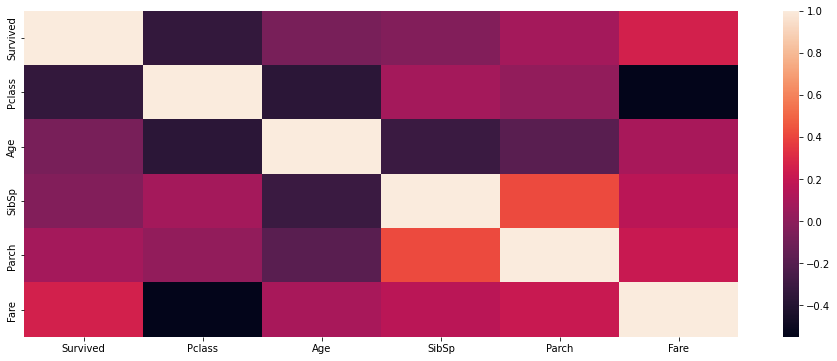

In [13]:
plt.figure(figsize=(16,6))
sns.heatmap(correlation)

**SibSp&Parch,Fare&Pclass,Age&Pclass,Fare&Survived,Pclass&Survived,SibSp&Age, are the pairs that show some reasonable but not great correlation. **

**At this point, we would like to take care of null values.<br>
Since null values form approximately 20% of the training dataset, dropping will not be a great option. Also, since the age did not show significance, we will fill null values with the mean age. **

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
mean_age = np.mean(df["Age"])
df["Age"].fillna(mean_age,inplace=True)
df["Embarked"].fillna("S",inplace=True)
df.isnull().sum().sum()

0

# **PREPROCESSING**

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Survived"] = le.fit_transform(df["Survived"])
df = pd.get_dummies(df)
tst = pd.get_dummies(test)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [17]:
y = df["Survived"].values.reshape(-1,1)
X = df.drop(["Survived"],axis=1)

In [18]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **LOGISTIC REGRESSION**

In [19]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train.ravel())

lgr_proba = lgr.predict_proba(x_test)[:,1]
lgr_preds = np.where(lgr_proba > 0.5,1,0)
lgr_preds[:5]

array([0, 0, 0, 1, 1])

In [20]:
lgr_confusion_matrix = confusion_matrix(y_test,lgr_preds)
print(lgr_confusion_matrix)
print(f'Which corresponds to an accuracy of {accuracy_score(y_test,lgr_preds)}')

[[89 16]
 [20 54]]
Which corresponds to an accuracy of 0.7988826815642458


In [21]:
false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,lgr_proba)
lgr_roc_auc = auc(false_positive_rate,true_positive_rate)
lgr_roc_auc

0.8797940797940799

In [22]:
#Function to plot the ROC CURVE -- plot_roc
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title("Receiving Operator Characteristic")
    plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC=%0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.axis('tight')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

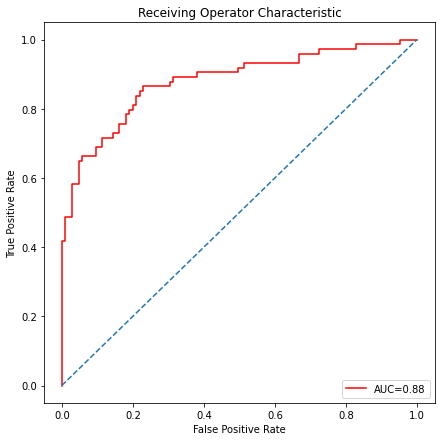

In [23]:
plot_roc(lgr_roc_auc)

# **LINEAR DISCRIMINANT ANALYSIS**

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train.ravel())
lda_proba = lda.predict_proba(x_test)[:,1]
lda_preds = np.where(lda_proba > 0.5,1,0)
lda_preds[:5]

array([0, 0, 0, 1, 1])

In [25]:
lda_confusion_matrix = confusion_matrix(y_test,lda_preds)
print(lda_confusion_matrix)
print(f'Which corresponds to an accuracy of {accuracy_score(y_test,lda_preds)}')

[[89 16]
 [21 53]]
Which corresponds to an accuracy of 0.7932960893854749


In [26]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,lda_proba)
lda_roc_auc = auc(false_positive_rate,true_positive_rate)
lda_roc_auc

0.8777348777348779

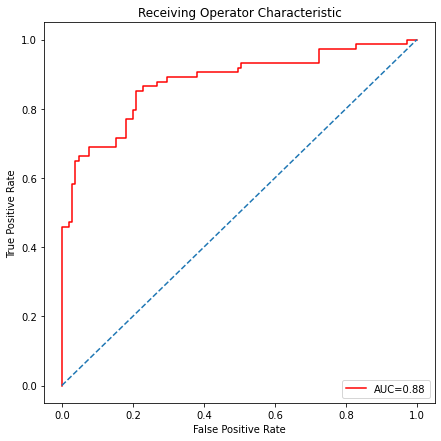

In [27]:
#Reusing the roc_auc function, with the appropriate parameter
plot_roc(lda_roc_auc)

# **QUADRATIC DISCRIMINANT ANALYSIS**

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train.ravel())
qda_proba = qda.predict_proba(x_test)[:,1]
qda_preds = np.where(qda_proba > 0.5,1,0)
qda_preds[:5]

array([0, 0, 0, 1, 1])

In [29]:
qda_confusion_matrix = confusion_matrix(y_test,qda_preds)
print(qda_confusion_matrix)
print(f'Which corresponds to an accuracy of {accuracy_score(y_test,qda_preds)}')

[[92 13]
 [24 50]]
Which corresponds to an accuracy of 0.7932960893854749


In [30]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,qda_proba)
qda_roc_auc = auc(false_positive_rate,true_positive_rate)
qda_roc_auc

0.8095238095238095

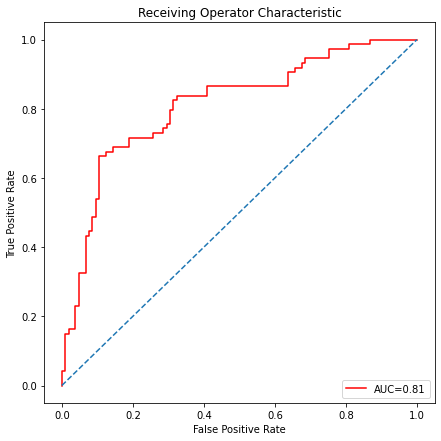

In [31]:
plot_roc(qda_roc_auc)

# **BAGGING**

In [32]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train,y_train.ravel())
bc_proba = bc.predict_proba(x_test)[:,1]
bc_preds = np.where(bc_proba > 0.5,1,0)
bc_preds[:5]

array([0, 0, 0, 1, 0])

In [33]:
bc_confusion_matrix = confusion_matrix(y_test,bc_preds)
print(bc_confusion_matrix)
print(f'Which corresponds to an accuracy of {accuracy_score(y_test,bc_preds)}')

[[90 15]
 [24 50]]
Which corresponds to an accuracy of 0.7821229050279329


In [34]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,bc_proba)
bc_roc_auc = auc(false_positive_rate,true_positive_rate)
bc_roc_auc

0.8545688545688546

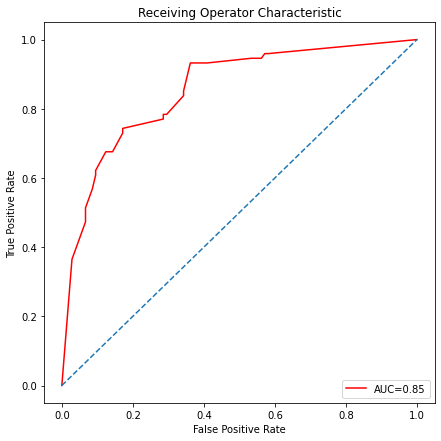

In [35]:
plot_roc(bc_roc_auc)

# **BOOSTING**

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train.ravel())
gbc_proba = gbc.predict_proba(x_test)[:,1]
gbc_preds = np.where(gbc_proba > 0.5,1,0)
gbc_preds[:5]

array([0, 0, 0, 1, 1])

In [37]:
gbc_confusion_matrix = confusion_matrix(y_test,gbc_preds)
print(gbc_confusion_matrix)
print(f'Which corresponds to an accuracy of {accuracy_score(y_test,gbc_preds)}')

[[94 11]
 [22 52]]
Which corresponds to an accuracy of 0.8156424581005587


In [38]:
false_positive_rate,true_positive_rate,threshold = roc_curve(y_test,gbc_proba)
gbc_roc_auc = auc(false_positive_rate,true_positive_rate)
gbc_roc_auc

0.8801158301158302

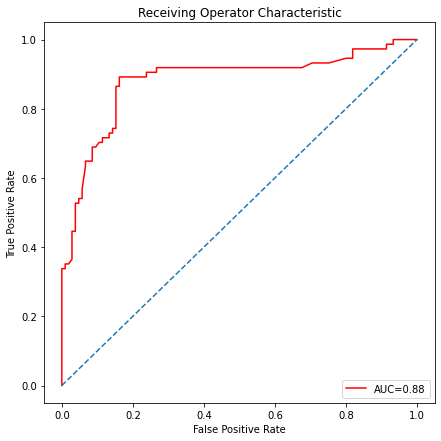

In [39]:
plot_roc(gbc_roc_auc)

**The Gradient Boosting Classifier has achieved the highest accuracy(82%) and roc_auc value(0.88). This suggests the model has had the best feel of the training dataset, and was able to generalize to previously unseen data.**

# **COMPILING SUBMISSIONS**

In [40]:
sample_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [41]:
tst.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [42]:
mean_age_test = np.mean(tst["Age"])
tst["Age"].fillna(mean_age_test,inplace=True)

mean_fare = np.mean(tst["Fare"])
tst["Fare"].fillna(mean_fare,inplace=True)
tst.isnull().sum().sum()

0

In [43]:
gbc_probabilities = gbc.predict_proba(tst)[:,1]
gbc_predictions = np.where(gbc_probabilities > 0.5,1,0)
gbc_predictions[:5]

array([0, 1, 0, 0, 0])

In [44]:
gbc_submission = sample_sub
gbc_submission["Survived"] = gbc_predictions
gbc_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [45]:
gbc_submission.to_csv("gbcsubmission.csv",index=False)